[2021-03-31 17:32:26,752] [TfPoseEstimator] [INFO] loading graph from /Users/andrewmumford/Desktop/p3-final/tf-pose-estimation/models/graph/mobilenet_thin/graph_opt.pb(default size=432x368)
2021-03-31 17:32:26,752 INFO loading graph from /Users/andrewmumford/Desktop/p3-final/tf-pose-estimation/models/graph/mobilenet_thin/graph_opt.pb(default size=432x368)


TfPoseEstimator/MobilenetV1/Conv2d_0/weights
TfPoseEstimator/image
TfPoseEstimator/MobilenetV1/Conv2d_0/Conv2D
TfPoseEstimator/MobilenetV1/Conv2d_0/Conv2D_bn_offset
TfPoseEstimator/MobilenetV1/Conv2d_0/BatchNorm/FusedBatchNorm
TfPoseEstimator/MobilenetV1/Conv2d_0/Relu
TfPoseEstimator/MobilenetV1/Conv2d_1_depthwise/depthwise_weights
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/weights
TfPoseEstimator/MobilenetV1/Conv2d_1_depthwise/depthwise
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/Conv2D
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/Conv2D_bn_offset
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/BatchNorm/FusedBatchNorm
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/Relu
TfPoseEstimator/MobilenetV1/Conv2d_2_depthwise/depthwise_weights
TfPoseEstimator/MobilenetV1/Conv2d_2_pointwise/weights
TfPoseEstimator/MobilenetV1/Conv2d_2_depthwise/depthwise
TfPoseEstimator/MobilenetV1/Conv2d_2_pointwise/Conv2D
TfPoseEstimator/MobilenetV1/Conv2d_2_pointwise/Conv2D_bn_offset
TfPoseEstimator/M

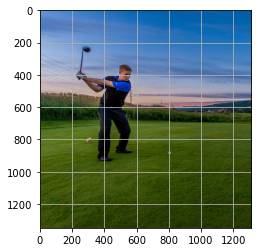

In [3]:
import sys
import time
import logging
import numpy as np
import matplotlib.pyplot as plt
import cv2

from tf_pose import common
from tf_pose.estimator import TfPoseEstimator
from tf_pose.networks import get_graph_path, model_wh

# params
model='mobilenet_thin'
resize='432x368'
w, h = model_wh(resize)

# creating estimator
e = TfPoseEstimator(get_graph_path(model), target_size=(w, h))

image_path = './images/golf.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.grid();

In [5]:
image.shape

(1348, 1313, 3)

In [6]:
image = common.read_imgfile(image_path, None, None)


In [7]:
humans = e.inference(image, resize_to_default=(w > 0 and h > 0), upsample_size=4.0)

In [8]:
e.heatMat[37][108]

array([-4.3269957e-04, -5.7379156e-04, -1.1431111e-03, -4.5770826e-04,
       -5.5851415e-04, -1.3914574e-03, -3.6010984e-04, -7.4752606e-04,
        4.4208206e-04, -7.7656400e-04,  7.1681617e-04,  1.0422722e-04,
       -5.7540019e-04,  2.4156645e-04, -5.4522417e-05,  9.3830749e-05,
       -2.8795656e-04, -1.2785150e-04,  9.9353266e-01], dtype=float32)

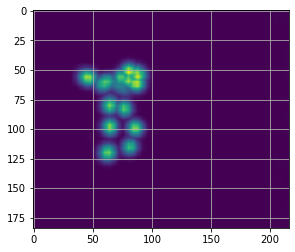

In [34]:
max_prob = np.amax(e.heatMat[:, :, :-1], axis=2)
plt.imshow(max_prob)
plt.grid();

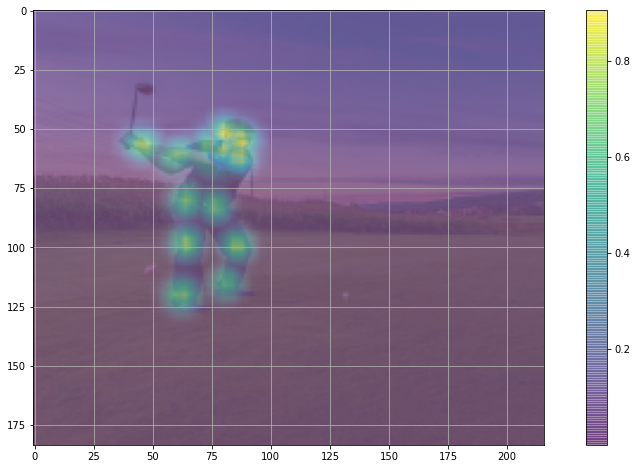

In [35]:
plt.figure(figsize=(15,8))
bgimg = cv2.cvtColor(image.astype(np.uint8), cv2.COLOR_BGR2RGB)
bgimg = cv2.resize(bgimg, (e.heatMat.shape[1], e.heatMat.shape[0]), interpolation=cv2.INTER_AREA)
plt.imshow(bgimg, alpha=0.5)
plt.imshow(max_prob, alpha=0.5)
plt.colorbar()
plt.grid();

In [36]:
image = TfPoseEstimator.draw_humans(image, humans, imgcopy=False)

2021-03-31 13:08:34,415 WARNING Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


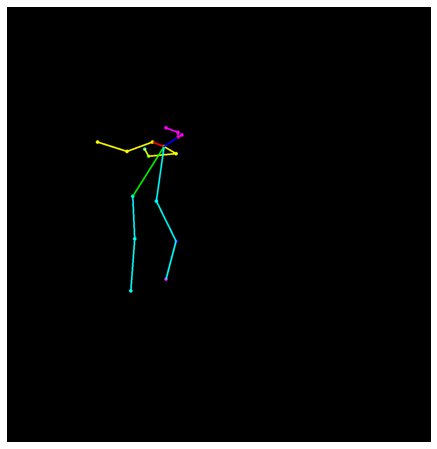

In [37]:
image = common.read_imgfile(image_path, None, None)
humans = e.inference(image, resize_to_default=(w > 0 and h > 0), upsample_size=4.0)
black_background = np.zeros(image.shape)
skeleton = TfPoseEstimator.draw_humans(black_background, humans, imgcopy=False)
plt.figure(figsize=(15,8))
plt.imshow(skeleton);
plt.grid(); 
plt.axis('off');

In [2]:
humans
# printing out 18 key points for this still

NameError: name 'humans' is not defined

In [1]:
keypoints = str(str(str(humans[0]).split('BodyPart:')[1:]).split('-')).split(' score=')
keypts_array = np.array(keypoints)
keypts_array = float(input(keypts_array))*1000
keypts_array = keypts_array.astype(int)

NameError: name 'humans' is not defined

In [ ]:
plt.figure(figsize=(10,10))
plt.axis([0, image.shape[1], 0, image.shape[0]])  
plt.scatter(*zip(*keypts_array), s=200, color='orange', alpha=0.6)
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(img)
ax=plt.gca() 
ax.set_ylim(ax.get_ylim()[::-1]) 
ax.xaxis.tick_top() 
plt.grid();
for i, txt in enumerate(keypts_array):
    ax.annotate(i, (keypts_array[i][0]-5, keypts_array[i][1]+5)